In [121]:
# import libraries
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [99]:
data1 = pd.read_csv('nvidia.csv')
data1


,Unnamed: 0,date,open,high,low,close,adjclose,volume
0,0,2015-01-02,0.503250,0.507000,0.495250,0.503250,0.483218,113680000
1,1,2015-01-05,0.503250,0.504750,0.492500,0.494750,0.475056,197952000
2,2,2015-01-06,0.495500,0.496000,0.479250,0.479750,0.460654,197764000
3,3,2015-01-07,0.483250,0.487500,0.477000,0.478500,0.459453,321808000
4,4,2015-01-08,0.484000,0.499500,0.483750,0.496500,0.476737,283780000
...,...,...,...,...,...,...,...,...
2364,2364,2024-05-24,104.448997,106.474998,103.000000,106.469002,106.460258,429494000
2365,2365,2024-05-28,110.244003,114.939003,109.883003,113.901001,113.891647,652728000
2366,2366,2024-05-29,113.050003,115.491997,110.901001,114.824997,114.815567,557442000
2367,2367,2024-05-30,114.650002,115.819000,109.663002,110.500000,110.490921,487350000


In [55]:
data2 = pd.read_csv('samsung.csv')  
data2


,Date,Open,High,Low,Close,Adj Close,Volume,percentage
0,2000-01-04,6.000.000.000,6.110.000.000,5.660.000.000,6.110.000.000,4.449.709.961,74195000,"8086,80%"
1,2000-01-05,5.800.000.000,6.060.000.000,5.520.000.000,5.580.000.000,4.063.728.760,74680000,"7766,47%"
2,2000-01-06,5.750.000.000,5.780.000.000,5.580.000.000,5.620.000.000,4.092.859.863,54390000,"10571,80%"
3,2000-01-07,5.560.000.000,5.670.000.000,5.360.000.000,5.540.000.000,4.034.598.877,40305000,"13794,81%"
4,2000-01-10,5.600.000.000,5.770.000.000,5.580.000.000,5.770.000.000,4.202.098.145,46880000,"11945,39%"
...,...,...,...,...,...,...,...,...
6122,2024-06-07,78.400.000.000,78.600.000.000,77.100.000.000,77.300.000.000,77.300.000.000,21189349,"369997,21%"
6123,2024-06-10,76.100.000.000,76.600.000.000,75.600.000.000,75.700.000.000,75.700.000.000,14598755,"521277,33%"
6124,2024-06-11,75.900.000.000,76.000.000.000,75.100.000.000,75.200.000.000,75.200.000.000,16971175,"447228,90%"
6125,2024-06-12,75.300.000.000,77.100.000.000,75.200.000.000,76.500.000.000,76.500.000.000,19246725,"391235,39%"


In [56]:
data3 = pd.read_csv('tesla.csv')
data3

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3500,2024-05-24,174.839996,180.080002,173.729996,179.240005,179.240005,65479700
3501,2024-05-28,176.399994,178.250000,173.160004,176.750000,176.750000,59736600
3502,2024-05-29,174.190002,178.149994,173.929993,176.190002,176.190002,54782600
3503,2024-05-30,178.580002,182.669998,175.380005,178.789993,178.789993,77784800


<Axes: >

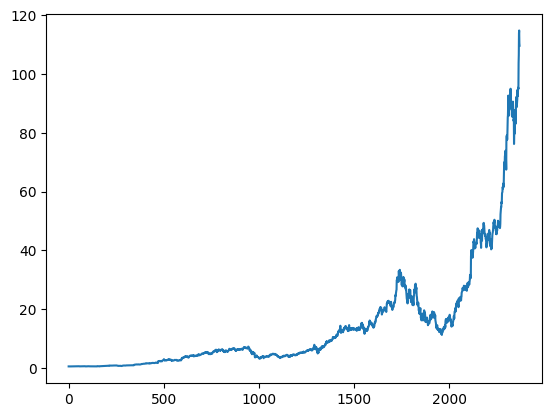

In [57]:
data1['close'].plot()


In [63]:
# data2['Close'].plot()

<Axes: >

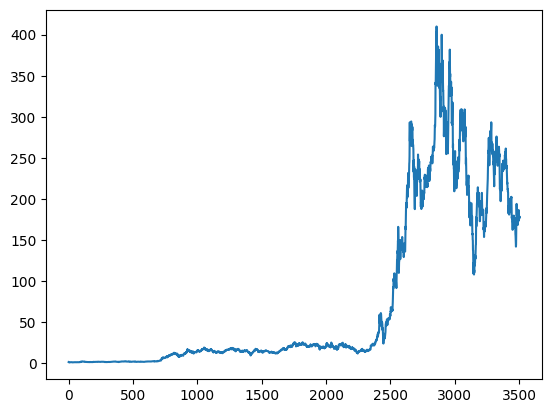

In [59]:
data3['Close'].plot()

In [165]:
#split training and testing data
train_data1 = data1.iloc[:int(.99*len(data1)), :]
test_data1 = data1.iloc[int(.99*len(data1)):, :]
# train_data1 = data1.iloc[:int(.90*len(data1)), :]
# test_data1 = data1.iloc[int(.90*len(data1)):, :]

In [166]:
#define features and target
features1 = ['open', 'volume']
target1 = 'close'

In [167]:
#create and train model
model1 = xgb.XGBRegressor()
model1.fit(train_data1[features1], train_data1[target1])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [168]:
#make and show predictions from test data
predictions1 = model1.predict(test_data1[features1])
print('Model Predictions:', predictions1)


Model Predictions: [87.685425 87.84421  83.728836 82.8857   87.88159  87.006714 89.11231
 88.61578  85.32983  85.69563  86.69327  88.75588  85.625145 86.06127
 86.23231  86.117485 85.64944  95.1936   87.25777  85.70799  88.73577
 89.94284  91.79311  90.95703 ]


In [169]:
#show the actual values
print('Actual Values:', test_data1[target1])

Actual Values: 2345     87.757004
2346     86.402000
2347     83.041000
2348     85.817001
2349     88.789001
2350     92.139999
2351     90.554001
2352     90.412003
2353     88.747002
2354     89.877998
2355     90.399002
2356     91.356003
2357     94.629997
2358     94.359001
2359     92.478996
2360     94.779999
2361     95.386002
2362     94.949997
2363    103.799004
2364    106.469002
2365    113.901001
2366    114.824997
2367    110.500000
2368    109.633003
Name: close, dtype: float64


In [170]:
#show model's accuracy
accuracy1 = model1.score(test_data1[features1], test_data1[target1])
print('Model Accuracy:', accuracy1)
mse = mean_squared_error(test_data1[target1], predictions1)
mae = mean_absolute_error(test_data1[target1], predictions1)
r2 = r2_score(test_data1[target1], predictions1)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

Model Accuracy: -0.5883065522629167
MSE: 129.49725065083234
MAE: 8.135057131449381
R²: -0.5883065522629167


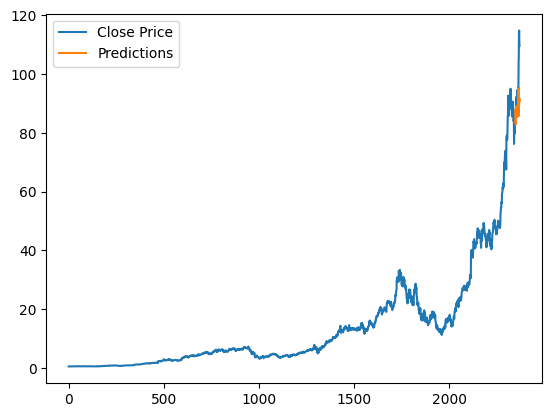

In [171]:
#plot predictions and close price for nvidia
plt.plot(data1['close'], label = 'Close Price')
plt.plot(test_data1[target1].index, predictions1, label = 'Predictions') 
plt.legend()
plt.show()

In [80]:
train_data3 = data3.iloc[:int(.99*len(data3)), :]
test_data3 = data3.iloc[int(.99*len(data3)):, :]

In [83]:
features3 = ['Open', 'Volume']
target3 = 'Close'

In [84]:
model3 = xgb.XGBRegressor()
model3.fit(train_data3[features3], train_data3[target3])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [85]:
predictions3 = model3.predict(test_data3[features3])
print('Model Predictions:', predictions3)

Model Predictions: [170.8692  169.4977  171.23256 161.21404 160.95398 148.90028 148.3762
 140.655   143.81448 155.44308 160.07146 171.48222 176.50584 185.57956
 179.72021 183.82883 178.78091 183.23296 184.20418 170.81902 172.85976
 174.00699 169.42633 174.70683 178.72113 172.63948 173.41295 173.38145
 177.0079  184.683   179.88658 172.89618 173.09637 172.51076 176.45593
 177.82335]


In [86]:
print('Actual Values:', test_data3[target3])

Actual Values: 3469    174.600006
3470    171.050003
3471    161.479996
3472    157.110001
3473    155.449997
3474    149.929993
3475    147.050003
3476    142.050003
3477    144.679993
3478    162.130005
3479    170.179993
3480    168.289993
3481    194.050003
3482    183.279999
3483    179.990005
3484    180.009995
3485    181.190002
3486    184.759995
3487    177.809998
3488    174.720001
3489    171.970001
3490    168.470001
3491    171.889999
3492    177.550003
3493    173.990005
3494    174.839996
3495    177.460007
3496    174.949997
3497    186.600006
3498    180.110001
3499    173.740005
3500    179.240005
3501    176.750000
3502    176.190002
3503    178.789993
3504    178.080002
Name: Close, dtype: float64


In [87]:
accuracy3 = model3.score(test_data3[features3], test_data3[target3])
print('Model Accuracy:', accuracy3)

Model Accuracy: 0.7967614238523703


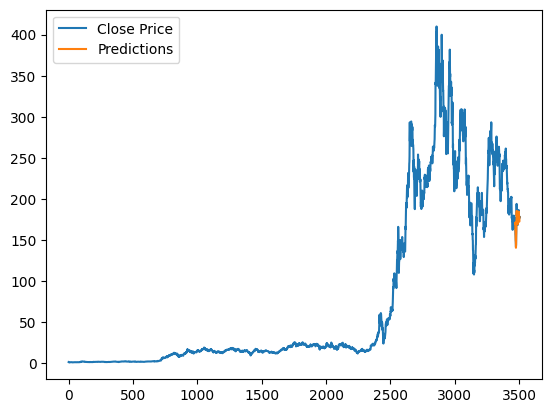

In [97]:
#tesla
plt.plot(data3['Close'], label = 'Close Price')
plt.plot(test_data3[target3].index, predictions3, label = 'Predictions')
plt.legend()
plt.show()

Observations:

Graph 1 (NVIDIA):

This graph shows a shorter time series compared to the Tesla graph.
NVIDIA's stock price has also shown significant growth, especially towards the end of the series.
The predictions appear only at the end of the time series, similar to the Tesla graph.
The predictions diverge significantly from the actual close price, showing much lower values.
The prediction line is smoother and doesn't capture the sharp upward trend seen in the actual price.

Graph 2 (Tesla):

The graph shows a much longer time series, with over 3000 data points compared to about 2300 in the second graph.
Tesla's stock price has experienced significant volatility and growth, reaching peaks above 400.
The predictions (orange line) appear only at the end of the time series.
The predictions closely follow the actual close price trend, suggesting accuracy.
The prediction line is smoother than the actual price line, indicating it may be capturing the overall trend rather than day-to-day fluctuations.

Comparison:

Accuracy: The Tesla predictions appear more accurate and useful, closely following the actual price trend. The NVIDIA predictions, in contrast, significantly underestimate the stock's performance.
Volatility: Both stocks show high volatility, but the Tesla stock seems more volatile overall.
Growth: Both stocks show significant growth, but the patterns differ. Tesla's growth is more erratic, while NVIDIA's shows a more consistent upward trend, especially in the latter part of the series.
Prediction usefulness: The Tesla predictions seem more useful for forecasting future price movements, while the NVIDIA predictions appear less reliable given their significant deviation from actual prices.
Time scale: The longer time series for Tesla might contribute to more accurate predictions, as there's more historical data to work with.

In conclusion, the predictions for Tesla appear more accurate and useful, while those for NVIDIA seem to have missed a significant upward trend, rendering them less useful for investment decisions.